In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
df=pd.read_csv('df.csv')

In [19]:
X = df.drop("default", axis=1)

y = df.pop("default")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)

In [21]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [22]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [23]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.934


Text(0.5, 1.0, 'Train Data')

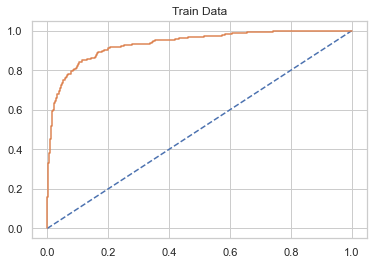

In [24]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title('Train Data')

AUC: 0.946


Text(0.5, 1.0, 'Test Data')

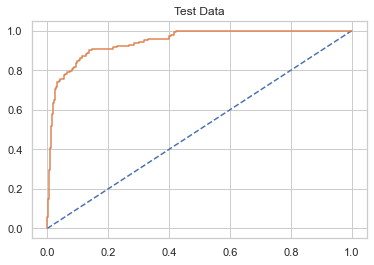

In [25]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title('Test Data')

Text(0.5, 1.0, 'Train Data Log Reg')

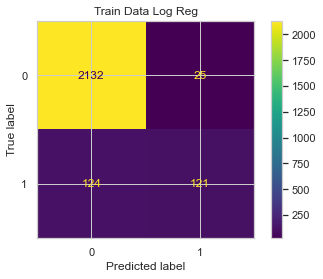

In [26]:
plot_confusion_matrix(model,X_train,y_train);
plt.title('Train Data Log Reg')

In [27]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2157
           1       0.83      0.49      0.62       245

    accuracy                           0.94      2402
   macro avg       0.89      0.74      0.79      2402
weighted avg       0.93      0.94      0.93      2402



Text(0.5, 1.0, 'Test Data Log Reg')

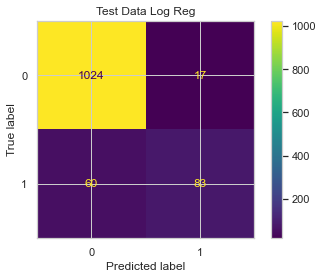

In [28]:
plot_confusion_matrix(model,X_test,y_test);
plt.title('Test Data Log Reg')

In [29]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1041
           1       0.83      0.58      0.68       143

    accuracy                           0.93      1184
   macro avg       0.89      0.78      0.82      1184
weighted avg       0.93      0.93      0.93      1184



In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [33]:
dt = pd.read_csv('df.csv')

In [34]:
dt.head()

,Networth,TotalDebt,GrossBlock,CurrentLiabilitiesandProvisions,PBIDT,PBIT,BookValueAdjUnitCurr,CurrentRatioLatest,FixedAssetsRatioLatest,InterestCoverRatioLatest,default
0,0.251841,0.656390,1.606845,0.362355,-0.427280,-0.320686,1.611507,-1.422793,-0.868844,-0.743877,1
1,-0.585446,-0.183822,-0.697930,-0.558455,-0.604603,2.890083,-1.346243,-1.362245,-0.761273,-1.050758,1
2,1.888657,0.705873,2.230385,2.135730,1.632460,1.205863,1.927236,-0.373296,-0.855935,-1.707674,1
3,0.200915,0.627965,1.298723,0.563278,0.386650,0.425277,-2.078673,-1.352154,1.316995,-0.724697,1
4,1.675713,0.830638,1.974577,1.590272,2.216425,2.095039,0.886922,-0.938410,-0.847330,-0.998013,1


In [35]:
X1 = dt.drop("default", axis=1)

Y = dt.pop("default")

In [36]:
X_train1,X_test1,Y_train1,Y_test1 = model_selection.train_test_split(X1,Y,test_size=0.33,random_state=42)

In [37]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train1,Y_train1)

In [38]:
pred_class_train = model1.predict(X_train1)
pred_class_test = model1.predict(X_test1)

In [69]:
X_train1.head()

,Networth,TotalDebt,GrossBlock,CurrentLiabilitiesandProvisions,PBIDT,PBIT,BookValueAdjUnitCurr,CurrentRatioLatest,FixedAssetsRatioLatest,InterestCoverRatioLatest
662,-0.702412,-0.683014,-0.698523,-0.722541,-0.625732,-0.605635,-0.623993,-0.372287,-0.765576,-0.647977
1373,-0.600008,-0.683014,-0.698523,-0.713137,-0.614916,-0.587930,0.503399,0.352270,-0.696731,-0.647977
3268,0.263459,-0.530709,-0.650638,-0.354174,-0.892836,-0.702028,0.314003,-0.655853,0.697387,-0.542487
3246,1.878272,0.569079,1.842891,2.168455,2.432545,1.898613,2.112590,-0.181561,0.383280,-0.252868
1456,-0.621330,-0.498962,-0.610615,-0.699165,-0.475018,-0.435472,-0.590156,0.393645,1.136276,1.178922


In [67]:
pred_class_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
X_test1.head()

,Networth,TotalDebt,GrossBlock,CurrentLiabilitiesandProvisions,PBIDT,PBIT,BookValueAdjUnitCurr,CurrentRatioLatest,FixedAssetsRatioLatest,InterestCoverRatioLatest
3163,1.654536,0.465345,0.599983,0.924928,1.686256,1.423928,0.044357,-0.322839,2.267921,-0.154091
3133,1.893879,0.834174,0.197061,3.225247,1.196182,0.880685,0.355176,-0.686127,0.056265,1.878993
937,-0.677609,-0.683014,-0.711581,-0.721735,-0.685585,-0.684323,-0.866240,-0.062483,-0.868844,-0.647977
196,-0.889378,-0.276866,-0.364257,-0.400388,-0.581023,-0.642028,-1.692695,-1.160419,-0.541829,-0.633592
2852,2.074376,0.752703,3.108037,0.279117,0.575656,-1.743661,-0.667112,0.141362,-0.176088,0.143199


In [90]:
Y_train1

662     0
1373    0
3268    0
3246    0
1456    0
       ..
1130    0
1294    0
860     0
3507    0
3174    0
Name: default, Length: 2402, dtype: int64

In [91]:
Y_test1

3163    0
3133    0
937     0
196     1
2852    0
       ..
2953    0
3116    0
1010    0
1292    0
2130    0
Name: default, Length: 1184, dtype: int64

Text(0.5, 1.0, 'Train Data LDA')

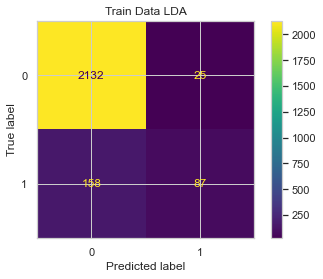

In [39]:
plot_confusion_matrix(model1,X_train1,Y_train1);
plt.title('Train Data LDA')

Text(0.5, 1.0, 'Test Data LDA')

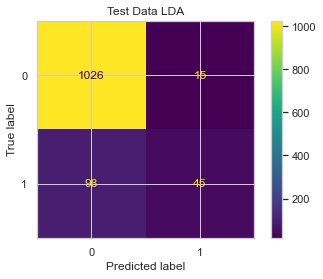

In [40]:
plot_confusion_matrix(model1,X_test1,Y_test1);
plt.title('Test Data LDA')

In [41]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train1,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test1,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2157
           1       0.78      0.36      0.49       245

    accuracy                           0.92      2402
   macro avg       0.85      0.67      0.72      2402
weighted avg       0.92      0.92      0.91      2402
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1041
           1       0.75      0.31      0.44       143

    accuracy                           0.90      1184
   macro avg       0.83      0.65      0.70      1184
weighted avg       0.89      0.90      0.89      1184
 



In [42]:
pred_prob_train = model1.predict_proba(X_train1)
pred_prob_test = model1.predict_proba(X_test1)

AUC for the Training Data: 0.932


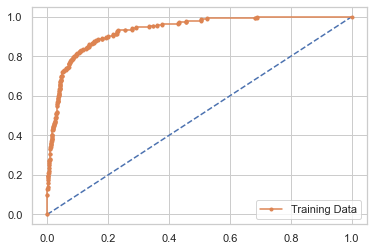

In [43]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train1,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train1,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.941


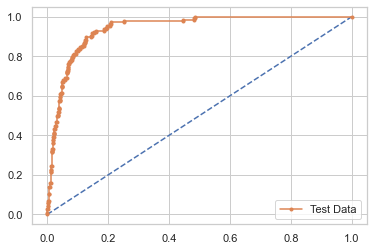

In [44]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test1,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test1,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [45]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Networth is -1.200194123134492
The coefficient for TotalDebt is 0.2938148767264865
The coefficient for GrossBlock is 0.6036888357420934
The coefficient for CurrentLiabilitiesandProvisions is 0.9108548618214206
The coefficient for PBIDT is -1.2121824268143804
The coefficient for PBIT is 0.4690372590191507
The coefficient for BookValueAdjUnitCurr is -2.004421364264967
The coefficient for CurrentRatioLatest is -1.0395436957623165
The coefficient for FixedAssetsRatioLatest is -0.4637332080302533
The coefficient for InterestCoverRatioLatest is -0.565646114426516


In [ ]:
# Random Forest Classifier

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.33, random_state=42)

In [52]:
param_grid = {
    'max_depth': [8,10],
    'max_features': [4,6,],
    'min_samples_leaf': [30,60],
    'min_samples_split': [90,180],
    'n_estimators': [150,200]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [53]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [30, 60],
                         'min_samples_split': [90, 180],
                         'n_estimators': [150, 200]})

In [54]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 200}

In [55]:
best_grid = grid_search.best_estimator_

In [56]:
best_grid

RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=30,
                       min_samples_split=90, n_estimators=200)

In [57]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [73]:
X_train.head()

,Networth,TotalDebt,GrossBlock,CurrentLiabilitiesandProvisions,PBIDT,PBIT,BookValueAdjUnitCurr,CurrentRatioLatest,FixedAssetsRatioLatest,InterestCoverRatioLatest
662,-0.702412,-0.683014,-0.698523,-0.722541,-0.625732,-0.605635,-0.623993,-0.372287,-0.765576,-0.647977
1373,-0.600008,-0.683014,-0.698523,-0.713137,-0.614916,-0.587930,0.503399,0.352270,-0.696731,-0.647977
3268,0.263459,-0.530709,-0.650638,-0.354174,-0.892836,-0.702028,0.314003,-0.655853,0.697387,-0.542487
3246,1.878272,0.569079,1.842891,2.168455,2.432545,1.898613,2.112590,-0.181561,0.383280,-0.252868
1456,-0.621330,-0.498962,-0.610615,-0.699165,-0.475018,-0.435472,-0.590156,0.393645,1.136276,1.178922


In [81]:
X_test.head()

,Networth,TotalDebt,GrossBlock,CurrentLiabilitiesandProvisions,PBIDT,PBIT,BookValueAdjUnitCurr,CurrentRatioLatest,FixedAssetsRatioLatest,InterestCoverRatioLatest
3163,1.654536,0.465345,0.599983,0.924928,1.686256,1.423928,0.044357,-0.322839,2.267921,-0.154091
3133,1.893879,0.834174,0.197061,3.225247,1.196182,0.880685,0.355176,-0.686127,0.056265,1.878993
937,-0.677609,-0.683014,-0.711581,-0.721735,-0.685585,-0.684323,-0.866240,-0.062483,-0.868844,-0.647977
196,-0.889378,-0.276866,-0.364257,-0.400388,-0.581023,-0.642028,-1.692695,-1.160419,-0.541829,-0.633592
2852,2.074376,0.752703,3.108037,0.279117,0.575656,-1.743661,-0.667112,0.141362,-0.176088,0.143199


In [82]:
train_labels

662     0
1373    0
3268    0
3246    0
1456    0
       ..
1130    0
1294    0
860     0
3507    0
3174    0
Name: default, Length: 2402, dtype: int64

In [83]:
test_labels

3163    0
3133    0
937     0
196     1
2852    0
       ..
2953    0
3116    0
1010    0
1292    0
2130    0
Name: default, Length: 1184, dtype: int64

Text(0.5, 1.0, 'Train Data Random Forest')

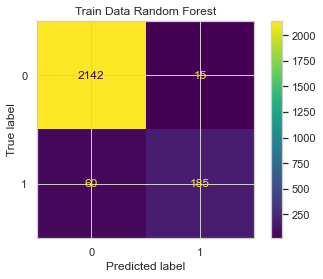

In [58]:
plot_confusion_matrix(best_grid,X_train,y_train);
plt.title('Train Data Random Forest')

Text(0.5, 1.0, 'Test Data Random Forest')

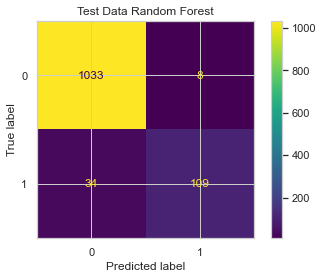

In [59]:
plot_confusion_matrix(best_grid,X_test,y_test);
plt.title('Test Data Random Forest')

In [86]:
print('Train Data Random Forest')
print(classification_report(train_labels,ytrain_predict1))

Train Data Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2157
           1       0.93      0.76      0.83       245

    accuracy                           0.97      2402
   macro avg       0.95      0.87      0.91      2402
weighted avg       0.97      0.97      0.97      2402



Area under Curve is 0.8740739689478016


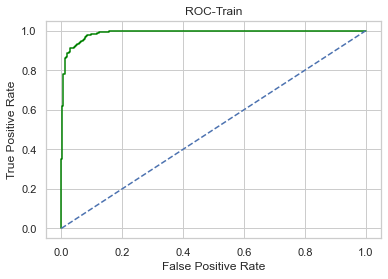

In [88]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Train')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [87]:
print('TestData Random Forest')
print(classification_report(test_labels,ytest_predict1))

TestData Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1041
           1       0.93      0.76      0.84       143

    accuracy                           0.96      1184
   macro avg       0.95      0.88      0.91      1184
weighted avg       0.96      0.96      0.96      1184



Area under Curve is 0.8772764219450098


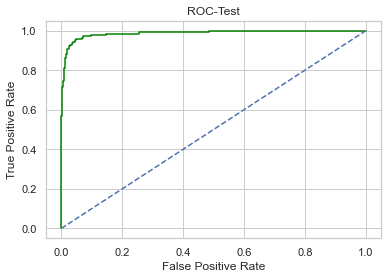

In [89]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Test')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [64]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                      Imp
Networth                         0.492103
BookValueAdjUnitCurr             0.343449
CurrentRatioLatest               0.072284
PBIDT                            0.031282
InterestCoverRatioLatest         0.015475
PBIT                             0.013962
TotalDebt                        0.013258
GrossBlock                       0.008718
CurrentLiabilitiesandProvisions  0.006301
FixedAssetsRatioLatest           0.003169


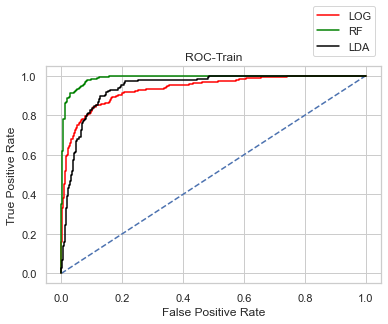

In [95]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr,color='red',label="LOG")
plt.plot(rf_train_fpr, rf_train_tpr,color='green',label="RF")

plt.plot(fpr, tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Train')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

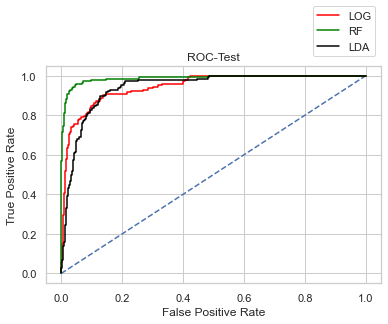

In [97]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr,color='red',label="LOG")
plt.plot(rf_test_fpr, rf_test_tpr,color='green',label="RF")

plt.plot(fpr, tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Test')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')